In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import torch
import torch.nn as nn
from torch.distributions import Normal
from torch.distributions.kl import kl_divergence
import sys
sys.path.append('..')

[   0.    5.   10.   15.   20.   25.   30.   35.   40.   45.   50.   55.
  100.  105.  110.  115.  120.  125.  130.  135.  140.  145.  150.  155.
  200.  205.  210.  215.  220.  225.  230.  235.  240.  245.  250.  255.
  300.  305.  310.  315.  320.  325.  330.  335.  340.  345.  350.  355.
  400.  405.  410.  415.  420.  425.  430.  435.  440.  445.  450.  455.
  500.  505.  510.  515.  520.  525.  530.  535.  540.  545.  550.  555.
  600.  605.  610.  615.  620.  625.  630.  635.  640.  645.  650.  655.
  700.  705.  710.  715.  720.  725.  730.  735.  740.  745.  750.  755.
  800.  805.  810.  815.  820.  825.  830.  835.  840.  845.  850.  855.
  900.  905.  910.  915.  920.  925.  930.  935.  940.  945.  950.  955.
 1000. 1005. 1010. 1015. 1020. 1025. 1030. 1035. 1040. 1045. 1050. 1055.
 1100. 1105. 1110. 1115. 1120. 1125. 1130. 1135. 1140. 1145. 1150. 1155.
 1200. 1205. 1210. 1215. 1220. 1225. 1230. 1235. 1240. 1245. 1250. 1255.
 1300. 1305. 1310. 1315. 1320. 1325. 1330. 1335. 13

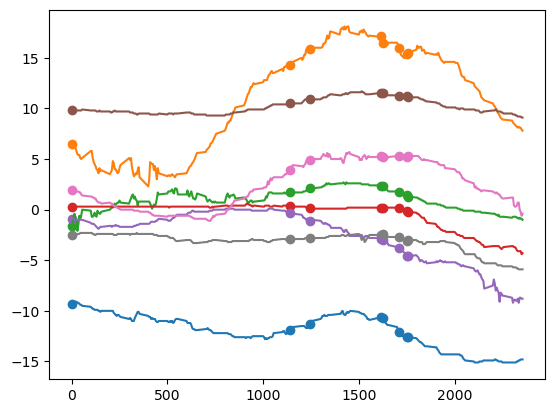

In [2]:
import pandas as pd
from data.tempdata import TempData
import matplotlib.pyplot as plt
# Load the data
data_path = '../data/data_with_desc.csv'
data = pd.read_csv(data_path, header=None)
data_test = TempData(data=data, max_num_context=10)

batch, knowledge = data_test.generate_batch(batch_size=8, return_knowledge=True)

print(knowledge)
for i in range(8):
    x_target = batch.x_target[i].flatten()
    y_target = batch.y_target[i].flatten()
    plt.plot(x_target.numpy(), y_target.numpy())
for i in range(8):
    x_context = batch.x_context[i].flatten()
    y_context = batch.y_context[i].flatten()
    plt.scatter(x_context.numpy(), y_context.numpy())
plt.show()

In [11]:
print(sine_data_test.y_values)

tensor([[ -5.9000,  -5.6000,  -5.2000,  ...,  -8.1000,  -7.9000,  -8.0000],
        [ -8.4000,  -8.5000,  -8.8000,  ..., -16.3000, -16.3000, -16.3000],
        [-16.4000, -16.4000, -16.4000,  ..., -18.3000, -18.3000, -18.2000],
        ...,
        [  8.3000,   9.4000,   9.4000,  ...,   5.4000,   5.6000,   5.1000],
        [  5.2000,   4.7000,   3.9000,  ...,  11.1000,  11.1000,  11.2000],
        [ 11.3000,  11.3000,  11.3000,  ...,  10.4000,  10.4000,  10.3000]])


In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torch.utils.data import DataLoader
import numpy as np

class TemperatureDataset(Dataset):

    def __init__(self, data: pd.DataFrame, max_num_context: int = 10):
        self.data = data
        self.max_num_context = max_num_context

        x_values = data.iloc[0][1:].values.astype('float32')
        self.x_values = torch.from_numpy(x_values) # Shape: [1, num_points]
        self.y_values_train = torch.tensor(data.iloc[1:508, 1:].values).float()  # Shape: [num_samples, num_points]
        self.y_values_val = torch.tensor(data.iloc[619:, 1:].values).float()  # Shape: [num_samples, num_points]
    
    def __len__(self):
        return len(self.y_values_train)
    
    def __getitem__(self, idx):
        y_values = self.y_values_train[idx]
        num_total_points = self.x_values.size(-1)
        num_context = np.random.randint(low=1, high=self.max_num_context)

        context_indices = np.random.choice(num_total_points, num_context, replace=False)

        x_context = self.x_values[context_indices]
        y_context = y_values[context_indices]

        x_target = self.x_values
        y_target = y_values

        return x_context, y_context, x_target, y_target
    


Neural Process model created
latent_encoder.phi.mlp.0.weight torch.Size([128, 2])
latent_encoder.phi.mlp.0.bias torch.Size([128])
latent_encoder.phi.mlp.2.weight torch.Size([128, 128])
latent_encoder.phi.mlp.2.bias torch.Size([128])
latent_encoder.phi.mlp.4.weight torch.Size([128, 128])
latent_encoder.phi.mlp.4.bias torch.Size([128])
latent_encoder.rho.mlp.0.weight torch.Size([128, 128])
latent_encoder.rho.mlp.0.bias torch.Size([128])
latent_encoder.rho.mlp.2.weight torch.Size([256, 128])
latent_encoder.rho.mlp.2.bias torch.Size([256])
decoder.target_transform.weight torch.Size([128, 1])
decoder.target_transform.bias torch.Size([128])
decoder.decoder.mlp.0.weight torch.Size([128, 256])
decoder.decoder.mlp.0.bias torch.Size([128])
decoder.decoder.mlp.2.weight torch.Size([128, 128])
decoder.decoder.mlp.2.bias torch.Size([128])
decoder.decoder.mlp.4.weight torch.Size([128, 128])
decoder.decoder.mlp.4.bias torch.Size([128])
decoder.decoder.mlp.6.weight torch.Size([128, 128])
decoder.decode

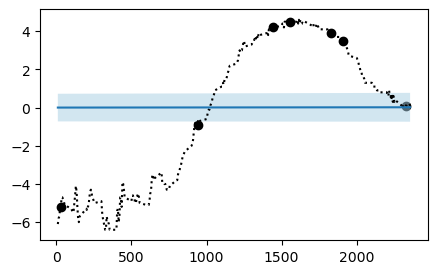

iter 1001: Avg. Loss = 4.199376019477844
iter 2001: Avg. Loss = 3.343551012992859
iter 3001: Avg. Loss = 3.3064621543884276
iter 4001: Avg. Loss = 3.297881827354431
iter 5001: Avg. Loss = 2.494889897108078
iter 6001: Avg. Loss = 2.1786674958467485
iter 7001: Avg. Loss = 2.1102062364816665
iter 8001: Avg. Loss = 2.0634106956720353
iter 9001: Avg. Loss = 1.9867562370300293
iter 10001: Avg. Loss = 1.9019759267568588
iter 10001: Avg. Loss SLOW = 26.88317750310898
iter 11001: Avg. Loss = 1.7955891016721726
iter 12001: Avg. Loss = 1.7538860552310944
iter 13001: Avg. Loss = 1.7183287955522537
iter 14001: Avg. Loss = 1.7089063462018967
iter 15001: Avg. Loss = 1.6842534890174865
iter 16001: Avg. Loss = 1.6611730922460557
iter 17001: Avg. Loss = 1.6572254621982574
iter 18001: Avg. Loss = 1.6408967353105546
iter 19001: Avg. Loss = 1.6231152836084366
iter 20001: Avg. Loss = 1.6236889164447785
iter 20001: Avg. Loss SLOW = 16.867063277482988


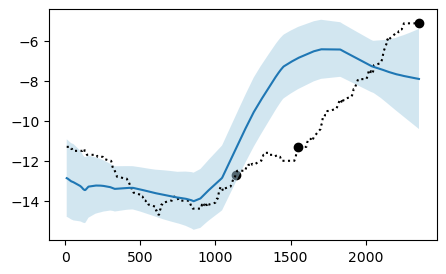

iter 21001: Avg. Loss = 1.6085302988290786
iter 22001: Avg. Loss = 1.6021052805185318
iter 23001: Avg. Loss = 1.5999546232223512
iter 24001: Avg. Loss = 1.578094015479088
iter 25001: Avg. Loss = 1.5703810005187988
iter 26001: Avg. Loss = 1.5711238857507706
iter 27001: Avg. Loss = 1.5687656680345534
iter 28001: Avg. Loss = 1.5533625284433366
iter 29001: Avg. Loss = 1.5469052822589875
iter 30001: Avg. Loss = 1.546494695544243
iter 30001: Avg. Loss SLOW = 15.74571727859974
iter 31001: Avg. Loss = 1.5371800389289856
iter 32001: Avg. Loss = 1.5313073666095733
iter 33001: Avg. Loss = 1.5339600026607514
iter 34001: Avg. Loss = 1.527451870083809
iter 35001: Avg. Loss = 1.5208712768554689
iter 36001: Avg. Loss = 1.5269009346961975
iter 37001: Avg. Loss = 1.5138246406316758
iter 38001: Avg. Loss = 1.501528506398201
iter 39001: Avg. Loss = 1.5057570542097092
iter 40001: Avg. Loss = 1.5061250672340394
iter 40001: Avg. Loss SLOW = 15.204906758308411


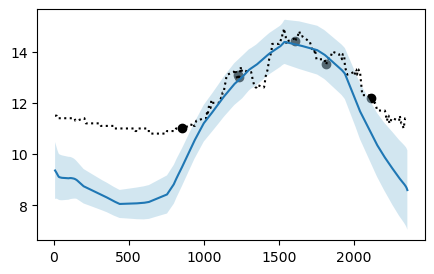

iter 41001: Avg. Loss = 1.4930603725910188
iter 42001: Avg. Loss = 1.500519736289978
iter 43001: Avg. Loss = 1.503752590060234
iter 44001: Avg. Loss = 1.4984557896852493
iter 45001: Avg. Loss = 1.4850842281579972
iter 46001: Avg. Loss = 1.480218336224556
iter 47001: Avg. Loss = 1.4821823766231537
iter 48001: Avg. Loss = 1.466335501074791
iter 49001: Avg. Loss = 1.4816754522323607
iter 50001: Avg. Loss = 1.478854362130165
iter 50001: Avg. Loss SLOW = 14.870138745069504
iter 51001: Avg. Loss = 1.4615056147575378
iter 52001: Avg. Loss = 1.4666646715402603
iter 53001: Avg. Loss = 1.467599619626999
iter 54001: Avg. Loss = 1.4621906362771988
iter 55001: Avg. Loss = 1.4527155590057372
iter 56001: Avg. Loss = 1.456975322008133
iter 57001: Avg. Loss = 1.4528310672044753
iter 58001: Avg. Loss = 1.455400257229805
iter 59001: Avg. Loss = 1.4634749534130096
iter 60001: Avg. Loss = 1.4575507490634918
iter 60001: Avg. Loss SLOW = 14.596908450126648


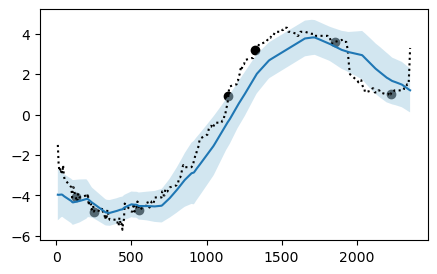

iter 61001: Avg. Loss = 1.4452668423652648
iter 62001: Avg. Loss = 1.4456575881242753
iter 63001: Avg. Loss = 1.440088481426239
iter 64001: Avg. Loss = 1.4495837564468383
iter 65001: Avg. Loss = 1.4450364818572998
iter 66001: Avg. Loss = 1.4386627055406571
iter 67001: Avg. Loss = 1.4345940277576446
iter 68001: Avg. Loss = 1.4315183526277542
iter 69001: Avg. Loss = 1.4352381438016892
iter 70001: Avg. Loss = 1.4338986909389495
iter 70001: Avg. Loss SLOW = 14.399545070886612
iter 71001: Avg. Loss = 1.4214414170980454
iter 72001: Avg. Loss = 1.422220515847206
iter 73001: Avg. Loss = 1.4144263778924941
iter 74001: Avg. Loss = 1.4258434295654296
iter 75001: Avg. Loss = 1.4147372156977653
iter 76001: Avg. Loss = 1.416853726387024
iter 77001: Avg. Loss = 1.4196746091842651
iter 78001: Avg. Loss = 1.4105654308199882
iter 79001: Avg. Loss = 1.4049947459697723
iter 80001: Avg. Loss = 1.401415217280388
iter 80001: Avg. Loss SLOW = 14.152172685742379


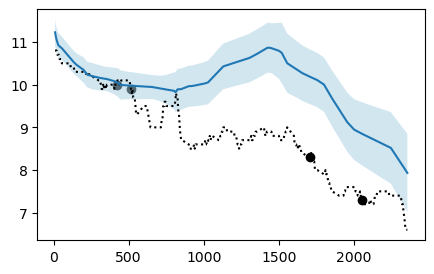

iter 81001: Avg. Loss = 1.401791217803955
iter 82001: Avg. Loss = 1.404706455230713
iter 83001: Avg. Loss = 1.3954966485500335
iter 84001: Avg. Loss = 1.3925842654705047
iter 85001: Avg. Loss = 1.4068451780080795
iter 86001: Avg. Loss = 1.3928851001262665
iter 87001: Avg. Loss = 1.393917972803116
iter 88001: Avg. Loss = 1.384846811890602
iter 89001: Avg. Loss = 1.3752514712810517
iter 90001: Avg. Loss = 1.375105737924576
iter 90001: Avg. Loss SLOW = 13.923430859088898
iter 91001: Avg. Loss = 1.3622719341516494
iter 92001: Avg. Loss = 1.3517899074554443
iter 93001: Avg. Loss = 1.3531751236915588
iter 94001: Avg. Loss = 1.3380356104373932
iter 95001: Avg. Loss = 1.339820772767067
iter 96001: Avg. Loss = 1.3288617042303086
iter 97001: Avg. Loss = 1.3203642668128013
iter 98001: Avg. Loss = 1.312471130490303
iter 99001: Avg. Loss = 1.3081722162365914
iter 100001: Avg. Loss = 1.2982846665382386
iter 100001: Avg. Loss SLOW = 13.313247332811356


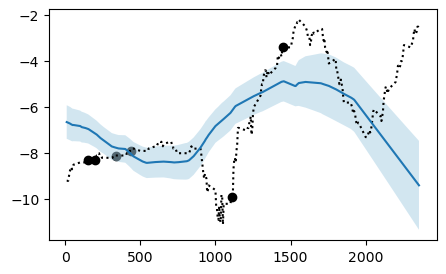

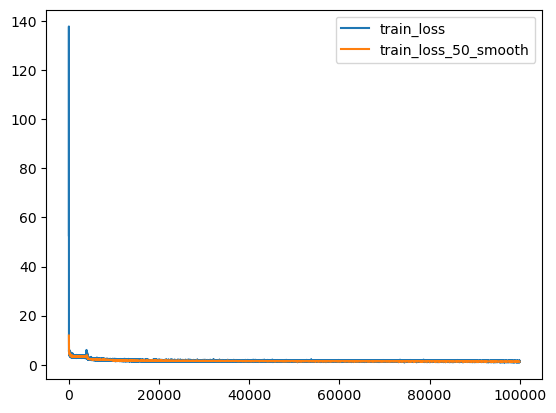

In [13]:
from src.plot import plot_predictive
from src.np import NeuralProcess

x_dim = 1
y_dim = 1
determ_dim = 128  # Dimension of representation of context points
latent_dim = 128  # Dimension of sampled latent variable
hidden_dim = 128  # Dimension of hidden layers in encoder and decoder
np = NeuralProcess(x_dim=x_dim,
                   y_dim=y_dim,
                   hidden_dim=hidden_dim,
                   latent_dim=latent_dim,
                   determ_dim=determ_dim,
                   n_h_layers_decoder=4,
                   n_h_layers_phi_latent_encoder=2,
                   n_h_layers_rho_latent_encoder=1,
                   n_h_layers_phi_determ_encoder=2,
                   n_h_layers_rho_determ_encoder=0,
                   use_deterministic_path=False)
print(np)
print(sum(p.numel() for p in np.parameters() if p.requires_grad))

#data = SineData(max_num_context=30, random_kernel_parameters=True)
optimiser = torch.optim.Adam(np.parameters(), lr=1e-3)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device {device}")
np.to(device)


data_path = '../data/data.csv'
data = pd.read_csv(data_path, header=None)
data = TempData(data=data , max_num_context=10)
train_loss = []
avg_loss_fast = 0
avg_loss_slow = 0
for iter in range(100000+1):
    np.training = True
    optimiser.zero_grad()

    batch = data.generate_batch(batch_size=16, device=device)
    p_y_pred, loss = np(batch.x_context, batch.y_context, batch.x_target, None, batch.y_target)

    loss.backward()
    optimiser.step()
    train_loss.append(loss.item())

    avg_loss_slow += loss.item()
    avg_loss_fast += loss.item()
    
    if iter % 1000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss = {avg_loss_fast/1000}")
        #print(f"iter. loss = {loss.item()}, iter. Loss2 (not being backpropped on) = {loss2.item()}")
        avg_loss_fast = 0 
    if iter % 10000 == 0 and iter > 0:
        print(f"iter {iter+1}: Avg. Loss SLOW = {avg_loss_slow/1000}")
        avg_loss_slow = 0 
    if iter % 20000 == 0:
        np.training = False
        batch = data.generate_batch(batch_size=1, device=np.device)
        plot_predictive(np, batch, knowledge=None, save=False, iter=None)
        np.training = True

plt.plot(train_loss, label='train_loss')
window = 50
plt.plot([sum(train_loss[i:i+window])/window for i in range(len(train_loss)-window)], label=f'train_loss_{window}_smooth')
plt.legend()
plt.show()